In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [64]:
mturk = pd.read_csv('Social distancing and face mask usage (MTurk) (Responses) - Form Responses 1.csv').drop(
    columns = ['Double check: Which country are you in right now? (please type)',
               'In February, which country were you in?',
               'If your country is different to the country your MTurk '+
               'account is registered in, please type in the country '+
               'you are in right now',
               'Reason',
               'Timestamp',
               'What is your worker ID?'])
mturk.columns = pd.MultiIndex.from_tuples([('country','country'),
                              ('distancing','2020-03-03'),
                              ('distancing','2020-03-10'),
                              ('distancing','2020-03-17'),
                              ('distancing','2020-03-24'),
                              ('distancing','2020-03-31'),
                              ('masks','2020-03-03'),
                              ('masks','2020-03-10'),
                              ('masks','2020-03-17'),
                              ('masks','2020-03-24'),
                              ('masks','2020-03-31'),
                              ('flag','')])
volunteers = pd.read_csv('Physical distancing and face mask usage (Responses) - Form Responses 1.csv').drop(
    columns = ['Timestamp',
               'Unnamed: 10'])
volunteers.columns = pd.MultiIndex.from_tuples([('country','country'),
                              ('distancing','2020-03-03'),
                              ('distancing','2020-03-10'),
                              ('distancing','2020-03-17'),
                              ('distancing','2020-03-24'),
                              ('masks','2020-03-03'),
                              ('masks','2020-03-10'),
                              ('masks','2020-03-17'),
                              ('masks','2020-03-24'),
                              ('masks','2020-03-31'),
                              ('distancing','2020-03-31')])


RESPONSES = {'The same number of people as usual':100,
             '25% less people than usual':75,
             '50% less people than usual':50,
             '75% less people than usual':25,
             'Almost nobody was out in public':5,
             'Almost everybody was not wearing a mask':5,
             '25% of people wore a mask':25,
             '50% of people wore a mask':50,
             '75% of people wore a mask':75,
             'Everybody was wearing a mask':95,
             '75% of the usual number':75,
             '50% of the usual number':50,
             '25% of the usual number':25,
             "I didn't go out during this week/don't remember":np.nan,
             "I didn't go out during this week":np.nan,
             "I didn't go out this week/don't remember":np.nan,
             np.nan:np.nan}

def str2quant(s):
    return RESPONSES[s]
volunteers.loc[:,['distancing','masks']] = volunteers[['distancing','masks']].applymap(str2quant)
mturk.loc[:,['distancing','masks']] = mturk[['distancing','masks']].applymap(str2quant)
mturk = mturk[pd.isna(mturk['flag'])].drop(columns=['flag'])
both = pd.concat([volunteers,mturk],ignore_index=True).reset_index()

/home/guest/.local/lib/python3.7/site-packages/pandas/core/generic.py:3936: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [65]:
def std_error(df):
    av = (df.groupby(('country','country')).std()*np.sqrt(df.groupby(('country','country')).count()/(df.groupby(('country','country')).count()-1))).mean().mean()
    den = np.maximum(1,np.sqrt(df.groupby(('country','country')).count()-1))
    return (df.groupby(('country','country')).std().fillna(av)/den)

def f(country):
    return country.split(' - ')[0]

both[('country','country')] = both[('country','country')].apply(f)

In [78]:
std_error(both).mean(1)

/home/guest/.local/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in sqrt
  This is separate from the ipykernel package so we can avoid doing imports until


(country, country)
Argentina                   20.027758
Australia                    3.968056
Belgium                     21.057217
Brazil                       3.278243
Canada                       8.853434
Czechia                      9.340401
Denmark                     21.057217
Estonia                     21.057217
France                       6.223478
Germany                      6.362190
India                        6.527542
Ireland                     21.057217
Japan                       10.373338
Jordan                      18.463344
Kenya                        0.078567
Luxembourg                  21.057217
Malaysia                    21.057217
Netherlands                 21.057217
New Zealand                 21.057217
North Cyprus                21.057217
Pakistan                    21.057217
Romania                     12.806489
Russia                       9.585225
Singapore                    9.190893
Slovakia                    21.057217
South Africa                19.

In [87]:
masks = pd.melt(both[['country','masks']],col_level=1,id_vars='country',var_name='date')
masks['date'] = pd.to_datetime(masks['date'])

a=both.groupby(('country','country'))['index'].count()
subset = list(a.index[a>=2])

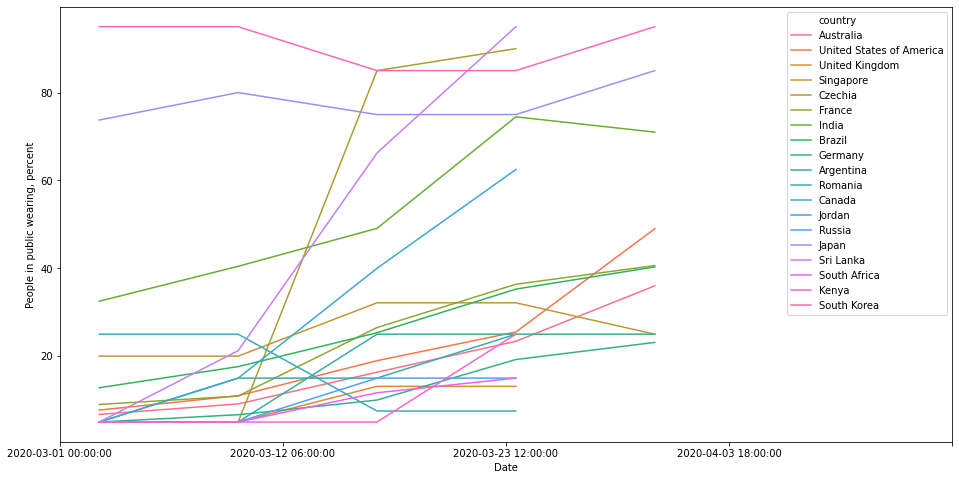

In [88]:
indices = masks['country'].isin(subset)

fig, ax = plt.subplots(figsize=(16,8))
sns.lineplot(data=masks[indices],x='date',y='value',hue='country',ax=ax,ci=None)
ax.set_ylabel('People in public wearing, percent')
ax.set_xlabel('Date')
ax.set_xlim([pd.Timestamp('2020-03-01'),pd.Timestamp('2020-04-15')])
xt = pd.to_datetime(np.linspace(pd.Timestamp('2020-03-01').value,pd.Timestamp('2020-04-15').value,5))
ax.set_xticks(xt)
ax.set_xticklabels(xt[:-1])
plt.savefig('/home/guest/Documents/mask_usage.png')

In [120]:
indices = masks['country'].isin(subset)

fig, ax = plt.subplots(figsize=(16,8))
sns.lineplot(data=masks[indices],x='date',y='value',hue='country',ax=ax)

plt.savefig('/home/guest/Documents/mask_usage.png')

array(['Australia', 'United States of America', 'Estonia',
       'United Kingdom', 'Singapore', 'Czechia', 'France', 'India',
       'Spain', 'Brazil', 'Switzerland', 'Germany', 'Argentina',
       'Romania', 'United States of America - California',
       'United Arab Emirates', 'Canada', 'Belgium',
       'United States of America - Texas',
       'United States of America - All other states', 'Jordan', 'Russia',
       'United States of America - New York',
       'United States of America - Ohio', 'Japan',
       'United States of America - Illinois',
       'United States of America - Florida', 'Sri Lanka', 'Sweden',
       'Slovakia', 'Ireland', 'Luxembourg',
       'United States of America - North Carolina',
       'United States of America - Pennsylvania',
       'United States of America - Georgia', 'South Africa', 'Kenya',
       'Netherlands', 'Pakistan', 'New Zealand', 'South Korea',
       'North Cyprus', 'Denmark'], dtype=object)

In [9]:
masks[masks['country']=='Brazil'].groupby('date').mean()

,value
date,
2020-03-03,12.803030
2020-03-10,17.615385
2020-03-17,25.327869
2020-03-24,35.263158
2020-03-31,40.312500


In [11]:
distance = pd.melt(both[['country','distancing']],col_level=1,id_vars='country',var_name='date')
distance['date'] = pd.to_datetime(distance['date'])

In [12]:
distance[distance['country']=='Brazil'].groupby('date').mean()

,value
date,
2020-03-03,83.030303
2020-03-10,67.461538
2020-03-17,42.258065
2020-03-24,28.679245
2020-03-31,28.265306


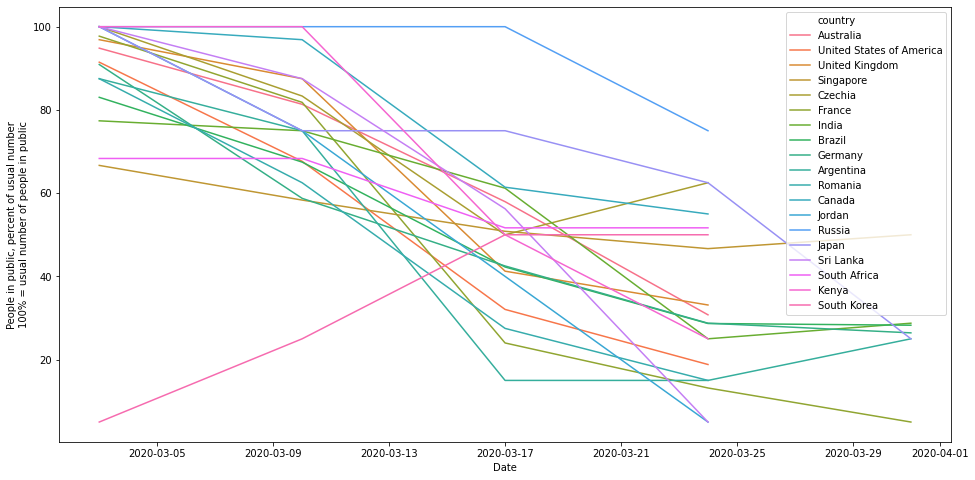

In [89]:

a=both.groupby(('country','country'))['index'].count()
subset = list(a.index[a>=2])
indices = distance['country'].isin(subset)


fig, ax = plt.subplots(figsize=(16,8))
sns.lineplot(data=distance[indices],x='date',y='value',hue='country',ax=ax,ci=None)
ax.set_ylabel('People in public, percent of usual number\n100% = usual number of people in public')
ax.set_xlabel('Date')
# ax.set_xlim([pd.Timestamp('2020-03-01'),pd.Timestamp('2020-04-10')])
plt.savefig('/home/guest/Documents/social_distance.png')

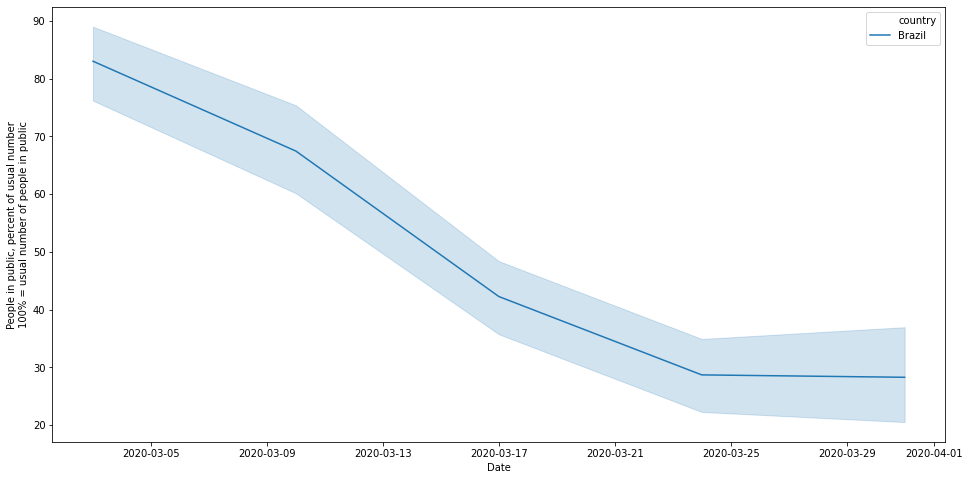

In [22]:
indices = distance['country'].isin(['Brazil'])


fig, ax = plt.subplots(figsize=(16,8))
sns.lineplot(data=distance[indices],x='date',y='value',hue='country',ax=ax)
ax.set_ylabel('People in public, percent of usual number\n100% = usual number of people in public')
ax.set_xlabel('Date')
plt.savefig('/home/guest/Documents/social_distance_brazil.png')

In [93]:
masks['value']/= 100
masks.rename(columns={'value':'Proportion Wearing Masks'})
masks.to_csv('mask_survey_data.csv')

distance['value'] /= 100
distance.rename(columns={'value':'Proportion in public'})
distance.to_csv('distance_survey_data.csv')

In [94]:
complete = pd.read_csv('Dataset completeness.csv')

In [99]:
complete[~pd.isna(complete['Complete up to date'])]['Country'].unique()

array(['Georgia', 'Albania', 'Vatican City', 'Ukraine', 'Iran', 'Austria',
       'France', 'United Kingdom', 'Poland', 'Norway', 'Macedonia',
       'Monaco', 'Moldova', 'Malta', 'Luxembourg', 'Lithuania',
       'Liechtenstein', 'Latvia', 'Spain', 'Montenegro', 'Russia',
       'Romania', 'Portugal', 'Netherlands', 'Australia',
       'United States of America - Washington, Oregon, California, Utah, Arizona, Idaho, Nevada',
       'Turkey', 'Italy', 'Denmark', 'Belgium', 'Germany', 'Croatia',
       'Bulgaria', 'Belarus', 'Hungary', 'Andorra', 'Mexico', 'Greece',
       'Egypt', 'Bosnia and Herzegovina',
       'United States of America - Wisconsin, Illinois, Indiana, Michigan, Ohio',
       'Sweden', 'San Marino', 'China', 'Taiwan', 'Nepal', 'Israel',
       'Slovakia', 'Afghanistan', 'Iraq', 'Iceland', 'Estonia',
       'Palestine', 'Cyprus', 'Slovenia', 'Serbia', 'Canada', 'Singapore',
       'South Africa', 'Namibia', 'Kazakhstan',
       'United States of America - Delaware, Flo